In [7]:
!date

Mon Jan 23 02:52:57 PST 2023


In [8]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks


In [9]:
import os
#from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [10]:
import pandas as pd
import scanpy as sc

In [11]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [72]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/'

In [13]:
diff_spl_introns = pd.read_csv(input_dir+'diff_introns_T4.csv')

In [14]:
diff_spl_intron_groups = pd.read_csv(input_dir+'diff_intron_groups_T4.csv')

In [15]:
input_dir= "/nowakowskilab/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/"

adata = sc.read_h5ad(input_dir+'/concat.3.new.h5ad')

adata = adata[(adata.obs['pool_well'] == '5_1') | (adata.obs['pool_well'] == '5_2')]

adata.obs_names = adata.obs_names.str.replace(pat='-1-22',repl='-0').str.replace(pat='-1-23',repl='-1')

adata_5prime = sc.read_h5ad('/c4/home/derek/data1/derek/data_scSLR/PBMC/5prime_exp_h5ad')

adata = adata[adata.obs_names.isin(adata_5prime.obs_names)]

adata.obsm['X_umap'] = adata_5prime.obsm['X_umap']

In [16]:
adata

AnnData object with n_obs × n_vars = 19087 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [11]:
adata.obs.ct2.cat.categories

Index(['B_Mem', 'B_Mem_Prolif', 'B_Naive', 'B_Preplasma', 'NKT', 'NK_CD16+',
       'NK_CD56++', 'NK_Prolif', 'PB', 'PB_Prolif', 'Progen_CLP', 'Progen_CMP',
       'Progen_MEP', 'Progen_MPP', 'T4_Mem', 'T4_Mem_Prolif', 'T4_Naive',
       'T4_Treg', 'T8_MAIT', 'T8_Mem', 'T8_Mem_Prolif', 'T8_Naive',
       'T_NK_Prolif', 'Tgd_1', 'Tgd_2', 'cDC_1', 'cDC_2', 'cM', 'ncM', 'pDC'],
      dtype='object')

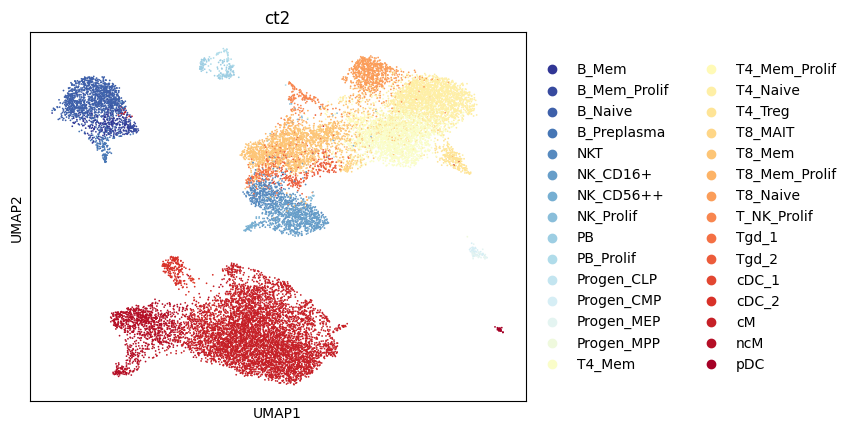

In [17]:
sc.pl.umap(adata,
           color='ct2',
           #groups=['B_Mem', 'B_Mem_Prolif', 'B_Naive', 'B_Preplasma'],
           palette='RdYlBu_r'
          )

In [74]:
#temp = adata[(adata.obs.ct1 == 'B') & (adata.obs.pool_well == '5_1')].obs.ct2    

#.to_csv('T8_sample_1_cell_list.txt')

#temp.index = temp.index.str[:-2]

# temp.to_csv('B_sample_1_cell_list.txt',header=None,sep='\t')

In [57]:
diff_spl_introns[diff_spl_introns['gene_name'] == "PTPRC"].intron_group

175     PTPRC_chr1_198699563_+
176     PTPRC_chr1_198699563_+
177     PTPRC_chr1_198703297_+
178     PTPRC_chr1_198703297_+
179     PTPRC_chr1_198703297_+
2103    PTPRC_chr1_198699563_+
2104    PTPRC_chr1_198699563_+
2105    PTPRC_chr1_198703297_+
2106    PTPRC_chr1_198703297_+
2107    PTPRC_chr1_198703297_+
4255    PTPRC_chr1_198699563_+
4256    PTPRC_chr1_198699563_+
4257    PTPRC_chr1_198703297_+
4258    PTPRC_chr1_198703297_+
4259    PTPRC_chr1_198703297_+
Name: intron_group, dtype: object

In [14]:
#sashimi_introns = diff_spl_introns[diff_spl_introns['name'] == 'PTPRC_chr1:198692374-198703297']

In [58]:
#sashimi_introns = diff_spl_introns[diff_spl_introns.intron_group == 'PTPRC_chr1_198703297_+']

In [59]:
sashimi_introns = diff_spl_introns[diff_spl_introns.intron_group == 'PTPRC_chr1_198699563_+']


In [60]:
groups_test = ['T_Mem','T_Naive','B_Mem','B_Naive']

In [61]:
groups_test

['T_Mem', 'T_Naive', 'B_Mem', 'B_Naive']

In [62]:
# link_files=[]

# for name in groups_test:
#     if name in sashimi_introns.test_group.unique():
        
#         link_files.append(name)
        
#         sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
#         #number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
#         f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
#         #for intron in range(number_introns):
#         f.write(str(sashimi_introns_['chromosome'].values[0])+'\t'
#                 +str(sashimi_introns_['start'].values[0])+'\t'
#                 +str(sashimi_introns_['start'].values[0])+'\t'
#                 +str(sashimi_introns_['chromosome'].values[0])+'\t'
#                 +str(sashimi_introns_['end'].values[0])+'\t'
#                 +str(sashimi_introns_['end'].values[0])+'\t'
#                 +str(sashimi_introns_['psi_a'].values[0])+'\n'
#                )

In [63]:
sashimi_introns.test_group.unique()

array(['T_Mem', 'T_Naive', 'B_Naive'], dtype=object)

In [64]:
link_files=[]

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
        f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )
        f.close()

In [65]:
groups_test

['T_Mem', 'T_Naive', 'B_Mem', 'B_Naive']

In [66]:
link_files

['T_Mem', 'T_Naive', 'B_Naive']

In [38]:
colors = pd.DataFrame(adata.uns['ct2_colors'],
             index=adata.obs['ct2'].cat.categories,
             columns=['color']
        
            )

In [40]:
colors = pd.DataFrame.from_dict([{'T_Mem':'#feefa6','T_Naive':'#fb9d59','B_Naive':'#3e60aa'}]).T
colors.coloumns = ['colors']

/scratch/derek/ipykernel_47813/2290653099.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  colors.coloumns = ['colors']


In [41]:
colors

,0
T_Mem,#feefa6
T_Naive,#fb9d59
B_Naive,#3e60aa


In [32]:
link_files

['T_Mem', 'T_Naive', 'B_Naive']

In [67]:
##write ini file

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/'

for name in link_files:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/link_{name}.txt
bw_file = {bw_path}/{name}.bw
height = 6
bw_color = {colors.loc[name][0]}
number_of_bins = 1000
max_value = 12
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color ={colors.loc[name][0]}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 2.5
scale_line_width = 3
show_number = true
file_type = sashimiBigWig


"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))

In [68]:
# from pybiomart import Dataset

# dataset = Dataset(name='hsapiens_gene_ensembl',
#                   host='http://www.ensembl.org')

# genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
#               )

In [69]:
# genes[genes['Gene name'] == 'PTPRC']

In [70]:
!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --plotWidth 15 --region 'chr1:198690000-198705000' -o ./sashimi_plots/sashimi_T4_PTPRC.png 


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 1959.50it/s]
INFO:pygenometracks.tracksClass:initialize 3. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 2514.57it/s]
INFO:pygenometracks.tracksClass:initialize 4. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 2287.59it/s]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [genes]
100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 500.20it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.350087881088257
DEBUG:pygenometracks.tracksClass:Figure size in cm is 18.24282296650718 x 27.765957446808514. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotti

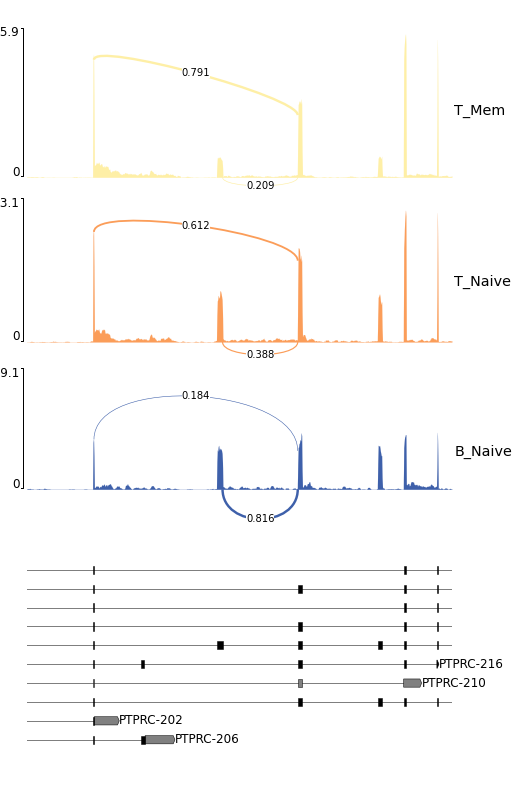

In [71]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_T4_PTPRC.png',retina=False)

In [55]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig3'

In [56]:
#!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --plotWidth 15 --region 'chr1:198690000-198705000' -o ./plots/sashimi_T4_PTPRC.pdf


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 2367.88it/s]
INFO:pygenometracks.tracksClass:initialize 3. [sashimi file test]
100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 3120.76it/s]
INFO:pygenometracks.tracksClass:initialize 4. [sashimi file test]
100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 3151.24it/s]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [genes]
100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 494.82it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:6.702941179275513
DEBUG:pygenometracks.tracksClass:Figure size in cm is 18.24282296650718 x 27.765957446808514. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotti